<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

Kecerdasan Artifisial dan Sains Data Dasar

Semester Genap 2021/2022

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *6*: *SVM***

</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: F_Lab1_1706979341_Lulu Ilmaknun Qurotaini.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **25 Mei 2022, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pertanyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [1]:
# Isi dengan data diri Anda
NAMA = "Muhammad Faisal Adi Soesatyo"
KELAS = "B"
NPM = "1906293184"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = [
    "https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/",
    "https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd",
    "https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html",
    "https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html",
    "https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC",
    "https://stats.stackexchange.com/questions/90736/the-difference-of-kernels-in-svm",
    ""
]

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Muhammad Faisal Adi Soesatyo dari kelas B dengan NPM 1906293184, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Muhammad Faisal Adi Soesatyo)


#SVM

Support Vector Machine (SVM) adalah salah satu metode supervised learning yang biasanya digunakan untuk klasifikasi (seperti Support Vector Classification) dan regresi (Support Vector Regression). Dalam pemodelan klasifikasi, SVM memiliki konsep yang lebih matang dan lebih jelas secara matematis dibandingkan dengan teknik-teknik klasifikasi lainnya. SVM juga dapat mengatasi masalah klasifikasi dan regresi dengan linear maupun non linear.

SVM digunakan untuk mencari hyperplane terbaik dengan memaksimalkan jarak terdekat antar kelas. Hyperplane adalah sebuah fungsi yang dapat digunakan untuk pemisah antar kelas. 

Dalam tutorial kali ini, kita menggunakan SVC, yaitu model klasifikasi yang menggunakan SVM dan juga SVR, yaitu model regresi yang menggunakan SVM



## Contoh penggunaan SVM

**Perlu diperhatikan kalau SVM hanya menerima dataset yang telah diubah ke numpy.ndarray, sehingga jika datasetnya masih dalam bentuk pandas, maka ubah ke numpy.ndarray**

Diambil dari : https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

In [97]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()

In [4]:
# print the names of the 13 features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)


Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [5]:
# print data(feature)shape
cancer.data.shape

(569, 30)

In [6]:
# print the cancer data features (top 5 records)
print(cancer.data[0:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [7]:
# print the cancer labels (0:malignant, 1:benign)
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [8]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [9]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_clf = clf.predict(X_test)

In [10]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy Classification:",metrics.accuracy_score(y_test, y_pred_clf))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision Classification:",metrics.precision_score(y_test, y_pred_clf))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall Classification:",metrics.recall_score(y_test, y_pred_clf))

Accuracy Classification: 0.9649122807017544
Precision Classification: 0.9811320754716981
Recall Classification: 0.9629629629629629


## Perbedaan tiap kernel SVC

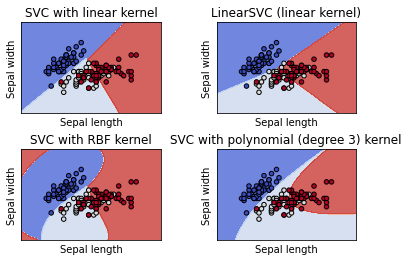

In [11]:
#source : https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

This example shows how to plot the decision surface for four SVM classifiers with different kernels.

The linear models LinearSVC() and SVC(kernel='linear') yield slightly different decision boundaries. This can be a consequence of the following differences:

1. LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.

2. LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction.

Both linear models have linear decision boundaries (intersecting hyperplanes) while the non-linear kernel models (polynomial or Gaussian RBF) have more flexible non-linear decision boundaries with shapes that depend on the kind of kernel and its parameters.

## Perbedaan tiap kernel di SVR

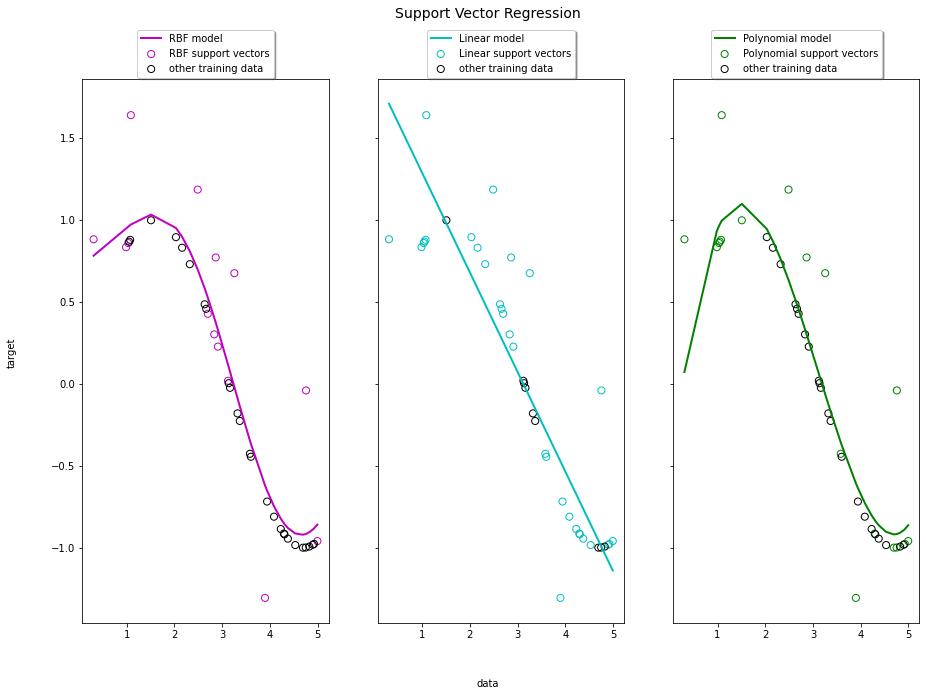

In [12]:
#source https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

## Import Libraries and Data

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
mushroom = pd.read_csv('jamur.csv')

In [15]:
# Mencetak dimensi data
print("data: ", mushroom.shape)

data:  (8124, 23)


In [16]:
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### Penjelasan Dataset

Dataset yang digunakan adalah dataset mengenai jamur dimana jamur tersebut dibagi menjadi 2 class yaitu poisonous dan edible.

Attribute Information: (classes: edible=e, poisonous=p)

* cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s

* cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s

* cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y

* bruises: bruises=t, no=f

* odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s

* gill-attachment: attached=a, descending=d, free=f, notched=n

* gill-spacing: close=c, crowded=w, distant=d

* gill-size: broad=b, narrow=n

* gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y

* stalk-shape: enlarging=e, tapering=t

* stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?

* stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s

* stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s

* stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

* stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

* veil-type: partial=p, universal=u

* veil-color: brown=n, orange=o, white=w, yellow=y

* ring-number: none=n, one=o, two=t

* ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z

* spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y

* population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y

* habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

## SOAL 1

Lakukanlah preprocessing terhadap data terlebih dahulu. Untuk memudahkan, silakan ikut langkah-langkah di bawah ini:

### SOAL 1a

Lakukan penanganan terhadap missing value pada data (Jika ada). Sertakan juga alasan dalam pemilihan penanganan missing value tersebut.

Check ukuran masing-masing kolom, untuk melihat apakah ada NaN

In [ ]:
display(mushroom.info())

Dapat dilihat bahwa pada RangeIndex terdapat 8124 entries. Dapat dilihat pula bahwa masing-masing kolom pun juga terdapat 8124 non-null value. Itu artinya pada masing-masing kolom tidak terdapat missing value atau NaN

Untuk memastikan lebih lanjut, perlu diperiksa sekali lagi menggunakan isnull(). Terkadang apabila jumlah kolom terlalu banyak dapat merepotkan untuk memeriksa satu persatu.

In [ ]:
# Implementasi code di sini
display(mushroom.isnull().sum())

Dari data diatas dapat dilihat bahwa pada masing-masing kolom tidak ditemukan adanya missing value atau NaN. Hal ini ditandai dengan hasil 0 pada masing-masing kolom.

### SOAL 1b

Lakukan penanganan terhadap duplikasi pada data (Jika ada). Sertakan juga alasan dalam pemilihan penanganan duplikasi data tersebut.

In [54]:
# Implementasi code di sini
display(mushroom.duplicated().sum())

0

Berdasarkan pemeriksaan duplikasi pada baris data tidak ditemukan adanya duplikasi data pada antar baris. Dapat dilihat bahwa return value dari sum of duplicated adalah 0.

Untuk duplikasi data pada column tentu ada, namun saya memutuskan untuk tidak tangani hal tersebut. Karena itu akan merusak keseluruhan data.

### SOAL 1c

Gunakan Label Encoder untuk mengubah data huruf menjadi data numerik!

In [ ]:
# Implementasi code di sini
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

mushroom_label_encoded = mushroom.copy()
mushroom_columns = mushroom.columns
for item in mushroom_columns:
  mushroom_label_encoded[item] = labelencoder.fit_transform(mushroom[item])

display(mushroom_label_encoded.head())

### SOAL 1d

Gunakan pandas.get_dummies untuk sepenuhnya mengubah data kategorikal menjadi numerikal!

In [ ]:
# Implementasi code di sini
mushroom_one_hot_encoded = pd.get_dummies(mushroom)
display(mushroom_one_hot_encoded.head())

### SOAL 1e 

Lakukan train test split menggunakan sklearn model selection!

Pemisahan menjadi feature dan target

In [119]:
mushroom_features = mushroom_label_encoded.drop('class', axis = 1)
mushroom_target = mushroom_label_encoded['class']

display(mushroom_features.shape)
display(mushroom_target.shape)

(8124, 22)

(8124,)

Implementasi split antara test dan train

In [120]:
# Implementasi code di sini
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(mushroom_features, mushroom_target, test_size=0.3, random_state=196)

## SOAL 2 (Linear SVC)

Implementasikan Linear SVC. Untuk soal ini gunakan library SVC dengan kernel linear dan LinearSVC kemudian bandingkan kedua library tersebut, sekalian lakukan hyperparameter tuning C untuk meningkatan akurasi model (Coba gunakan GridSearchCV).
* C merupakan parameter penalty, yang merepresentasikan
misklasifikasi atau error term. Misklasifikasi menjelaskan seberapa
besar error yang dapat ditoleransi untuk optimisasi SVM. Parameter ini
berkaitan dengan bagaimana kita mengontrol tradeoff antara
penetapan decision boundary (hyperplane) dengan error term. 

Tampilkan nilai akurasi, presisi, recall, dan F1-Score dari hasil prediksi yang didapat.

Hint: Coba [1, 10, 100,500, 1000] sebagai value C!

### SOAL 2a (SVC dengan kernel linear)

In [107]:
# Implementasi Kode Disini
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()
parameters = {'kernel': ['linear'], 'C': [1, 10, 100, 500, 1000]}
clf = GridSearchCV(svc, parameters)
clf.fit(x_train, y_train)
y_pred_svc_linear = clf.predict(x_test)

In [109]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy Classification:", metrics.accuracy_score(y_test, y_pred_svc_linear))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision Classification:", metrics.precision_score(y_test, y_pred_svc_linear))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall Classification:", metrics.recall_score(y_test, y_pred_svc_linear))
print("F1-Score Classification:", metrics.f1_score(y_test, y_pred_svc_linear))

Accuracy Classification: 0.9897456931911403
Precision Classification: 0.9792186201163757
Recall Classification: 1.0
F1-Score Classification: 0.9895002099958001


### SOAL 2b (LinearSVC)

In [112]:
# Implementasi Kode Disini
from sklearn.svm import LinearSVC

linear_svc = LinearSVC(random_state = 169, tol = 1e-5, max_iter = 100000)
linear_svc.fit(x_train, y_train)
y_pred_linear_svc = linear_svc.predict(x_test)

In [113]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy Classification:", metrics.accuracy_score(y_test, y_pred_linear_svc))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision Classification:", metrics.precision_score(y_test, y_pred_linear_svc))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall Classification:", metrics.recall_score(y_test, y_pred_linear_svc))
print("F1-Score Classification:", metrics.f1_score(y_test, y_pred_linear_svc))

Accuracy Classification: 0.955701394585726
Precision Classification: 0.9549319727891157
Recall Classification: 0.9533106960950763
F1-Score Classification: 0.9541206457094308


### SOAL 2c

Lakukan perbandingan terhadap hasil yang didapat pada soal nomor 2a dan 2b. Lakukan analisis terhadap kedua hasil tersebut dan tuliskan hasil analisis yang didapat.

*Dari docs sklearn, sebenarnya keduanya mirip, tetapi yang membedakan adalah bagaimana kedua library tersebut meng-handle multi-class. Di LinearSVC(), menggunakan One-vs-All multiclass reduction, sementara SVC() menggunakan One-vs-One multiclass reduction.*


In [114]:
print("Accuracy Diff: ", abs(metrics.accuracy_score(y_test, y_pred_svc_linear) - metrics.accuracy_score(y_test, y_pred_linear_svc)))
print("Precision Diff: ", abs(metrics.precision_score(y_test, y_pred_svc_linear) - metrics.precision_score(y_test, y_pred_linear_svc)))
print("Recall Diff: ", abs(metrics.recall_score(y_test, y_pred_svc_linear) - metrics.recall_score(y_test, y_pred_linear_svc)))
print("F1-Score Diff: ", abs(metrics.f1_score(y_test, y_pred_svc_linear) - metrics.f1_score(y_test, y_pred_linear_svc)))

Accuracy Diff:  0.03404429860541425
Precision Diff:  0.024286647327260047
Recall Diff:  0.04668930390492365
F1-Score Diff:  0.03537956428636935


Berdasarkan hasil yang saya dapat, keempat metric seperti akurasi, presisi, recall dan F1 score jauh lebih tinggi pada SVC(linear) ketimbang linearSVC. Hal ini dikarenakan pada SVC(linear) dilakukan optimisasi menggunakan GridSearchCV dengan berbagai macam jenis C. Sehingga hasil yang didapat dari SVC(linear) pun sudah cukup optimum ketimbang linearSVC.

Namun berdasarkan penghitungan selisih nilai pada masing-masing metric menunjukkan perbedaan yang tidak begitu jauh. Sebagian besar selisih kurang dari .05. Yang mana hal ini cukup tolerable dan dapat dikatakan cukup baik performance untuk masing-masing algoritma.

## SOAL 3 (Non-Linear SVC)

Implementasikan Non-Linear SVC. Untuk soal ini gunakan library SVC dengan kernel poly, rbf, dan sigmoid kemudian bandingkan ketiga library tersebut, sekalian lakukan hyperparameter tuning C untuk meningkatan akurasi model (Coba gunakan GridSearchCV). 

Tampilkan nilai akurasi, presisi, recall, dan F1-Score dari hasil prediksi yang didapat.

### SOAL 3a (Poly)

In [127]:
# Implementasi code di sini
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc_poly = SVC()
parameters = {'kernel': ['poly'], 'C': [1, 10, 100, 500, 1000]}
clf_poly = GridSearchCV(svc_poly, parameters)
clf_poly.fit(x_train, y_train)
y_pred_svc_poly = clf_poly.predict(x_test)

In [128]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy Classification:", metrics.accuracy_score(y_test, y_pred_svc_poly))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision Classification:", metrics.precision_score(y_test, y_pred_svc_poly))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall Classification:", metrics.recall_score(y_test, y_pred_svc_poly))
print("F1-Score Classification:", metrics.f1_score(y_test, y_pred_svc_poly))

Accuracy Classification: 1.0
Precision Classification: 1.0
Recall Classification: 1.0
F1-Score Classification: 1.0


### SOAL 3b (RBF)

In [129]:
# Implementasi code di sini
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc_rbf = SVC()
parameters = {'kernel': ['rbf'], 'C': [1, 10, 100, 500, 1000]}
clf_rbf = GridSearchCV(svc_rbf, parameters)
clf_rbf.fit(x_train, y_train)
y_pred_svc_rbf = clf_rbf.predict(x_test)

In [130]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy Classification:", metrics.accuracy_score(y_test, y_pred_svc_rbf))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision Classification:", metrics.precision_score(y_test, y_pred_svc_rbf))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall Classification:", metrics.recall_score(y_test, y_pred_svc_rbf))
print("F1-Score Classification:", metrics.f1_score(y_test, y_pred_svc_rbf))

Accuracy Classification: 1.0
Precision Classification: 1.0
Recall Classification: 1.0
F1-Score Classification: 1.0


### SOAL 3c (Sigmoid)

In [131]:
# Implementasi code di sini
# Implementasi code di sini
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc_sigmoid = SVC()
parameters = {'kernel': ['sigmoid'], 'C': [1, 10, 100, 500, 1000]}
clf_sigmoid = GridSearchCV(svc_sigmoid, parameters)
clf_sigmoid.fit(x_train, y_train)
y_pred_svc_sigmoid = clf_sigmoid.predict(x_test)

In [132]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy Classification:", metrics.accuracy_score(y_test, y_pred_svc_sigmoid))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision Classification:", metrics.precision_score(y_test, y_pred_svc_sigmoid))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall Classification:", metrics.recall_score(y_test, y_pred_svc_sigmoid))
print("F1-Score Classification:", metrics.f1_score(y_test, y_pred_svc_sigmoid))

Accuracy Classification: 0.6780147662018048
Precision Classification: 0.6686695278969957
Recall Classification: 0.6612903225806451
F1-Score Classification: 0.6649594536918481


### SOAL 3d

Lakukan perbandingan terhadap hasil yang didapat pada soal nomor 3a, 3b dan 3c. Lakukan analisis terhadap ketiga hasil tersebut dan tuliskan hasil analisis yang didapat.

Berdasarkan proses komputasi yang sudah saya lakukan, didapatkan hasil bahwa pada masing-masing metric SVC kernel poly menghasilkan hasil yang sama dengan SVC kernel RBF. Yakni sama-sama menghasilkan 1 untuk masing-masing metric akurasi, presisi, recall dan F1-score.

Hasil yang berbeda ditampilkan oleh SVC kernel sigmoid. Metric akurasi, presisi, recall dan F1-Score masing-masing adalah .68, .67, .66, .66; Nilai ini jauh lebih rendah dibandingkan pada SVC kernel poly dan RBF.

Berdasarkan hasil penelusuran yang saya lakukan, kernel sigmoid disini menggunakan model matematika yang sama dengan sigmoid function pada logistic regression. Yakni, K(X,Y) = tanh(γ⋅X'Y+r). Sebenarnya model matematis dari sigmoid mirip dengan polynomial, yakni K(X,Y) = (γ⋅X'Y+r)^d, γ > 0. Yang membedakan hanyalah penggunaan hyperbolic tan function pada sigmoid dan penggunaan pangkat degree pada polynomial.

## SOAL 4 (SVR)

Explore sendiri tentang SVR dan jawab pertanyaan di bawah ini:


1.   Apakah ada perbedaan LinearSVR dengan SVR(kernel = 'linear')? Jelaskan.
2.   Dari masing-masing kernel SVR, jelaskan kapan data cocok dengan kernel linear atau polynomial.
3. Jelaskan pengaruh parameter epsilon dan C dalam SVR.



